In [1]:
import time

# 코드 실행 시간을 측정할 함수
def some_function_to_measure():
    # 예시로 간단한 시간을 끄는 루프
    for _ in range(10000000):
        pass

# 시작 시간 기록
start_time = time.time()

# 측정할 코드 실행
some_function_to_measure()

# 종료 시간 기록
end_time = time.time()

# 경과 시간 계산
elapsed_time = end_time - start_time

# 시, 분, 초로 변환
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)

# 결과 출력
print(f"Elapsed time: {hours} hours, {minutes} minutes, {seconds} seconds")

Elapsed time: 0 hours, 0 minutes, 0 seconds


In [5]:
NUM_EPOCHS = 50
epoch = 2
train_loss = 0.0000
val_loss = 0.0000
h, m, s = int(elapsed_time // 3600), int((elapsed_time % 3600) // 60), int(elapsed_time % 60)
print(f"Epoch [{epoch+1:>2}/{NUM_EPOCHS}] - {h}:{m:>2}:{s:>2}s, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch [ 3/50] - 0: 0: 0s, Train Loss: 0.0000, Val Loss: 0.0000


In [9]:
import torch

loss_dict={
	'loss_classifier': torch.tensor(0.0551), 
 	'loss_box_reg': torch.tensor(0.0386), 
  	'loss_mask': torch.tensor(0.1592), 
   	'loss_objectness': torch.tensor(0.0044), 
   	'loss_rpn_box_reg': torch.tensor(0.0017)
}

In [10]:
loss_dict.values()

dict_values([tensor(0.0551), tensor(0.0386), tensor(0.1592), tensor(0.0044), tensor(0.0017)])

In [11]:
losses = sum(loss for loss in loss_dict.values())
losses

tensor(0.2590)

In [12]:
losses.item()

0.2590000331401825

In [13]:
import pandas as pd

history = {
    'train_loss': [0,0,0],
    'train_class_loss': [2,2,2],
    'train_box_loss': [3,3,3],
    'train_mask_loss': [4,4,4],
    'val_loss': [1,1,1],
    'val_class_loss': [5,5,5],
    'val_box_loss': [6,6,6],
    'val_mask_loss': [7,7,7]
}
df = pd.DataFrame(history)
df

,train_loss,val_loss,train_class_loss,train_box_loss,train_mask_loss,val_class_loss,val_box_loss,val_mask_loss
0,0,1,2,3,4,5,6,7
1,0,1,2,3,4,5,6,7
2,0,1,2,3,4,5,6,7


In [19]:
import random
train_n_batches = 2362
valid_n_batches = 292
history['train_loss'].append((random.uniform(100, 500)/train_n_batches))
history['train_class_loss'].append((random.uniform(100, 500)/train_n_batches))
history['train_box_loss'].append((random.uniform(100, 500)/train_n_batches))
history['train_mask_loss'].append((random.uniform(100, 500)/train_n_batches))
history['val_loss'].append((random.uniform(100, 500)/valid_n_batches))
history['val_class_loss'].append((random.uniform(100, 500)/valid_n_batches))
history['val_box_loss'].append((random.uniform(100, 500)/valid_n_batches))
history['val_mask_loss'].append((random.uniform(100, 500)/valid_n_batches))
df = pd.DataFrame(history)
df

,train_loss,val_loss,train_class_loss,train_box_loss,train_mask_loss,val_class_loss,val_box_loss,val_mask_loss
0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000
1,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000
2,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000
3,0.203031,1.508506,0.045116,0.150079,0.069115,0.868413,0.939514,1.584351


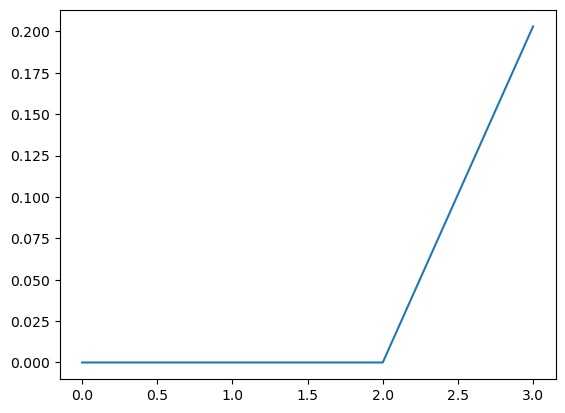

In [21]:
df['train_loss'].plot();

In [2]:
import numpy as np
import torch

pred = {'boxes': torch.tensor([[128.3508,  50.0531, 150.4191,  73.6116],
          [ 95.4021, 196.8708, 133.0644, 235.0270],
          [415.0556, 327.5433, 434.0832, 347.9129],
          [169.5990,  15.4423, 188.3002,  35.6968],
          [169.6282,  15.1050, 188.5282,  35.8340],
          [210.8997, 235.4694, 276.8505, 278.5871],
          [414.9402, 327.7391, 433.9455, 348.4162]]),
  'labels': torch.tensor([1, 1, 1, 2, 1, 1, 2]),
  'scores': torch.tensor([0.9879, 0.9811, 0.9658, 0.6280, 0.5437, 0.1325, 0.0523]),}

In [ ]:
boxes = prediction['boxes']
    scores = prediction['scores']
    labels = prediction['labels']

    keep = scores > threshold
    filtered_boxes = boxes[keep]
    filtered_scores = scores[keep]
    filtered_labels = labels[keep]

In [5]:
scores = pred['scores']
keep = scores > 0.7
keep, scores

(tensor([ True,  True,  True, False, False, False, False]),
 tensor([0.9879, 0.9811, 0.9658, 0.6280, 0.5437, 0.1325, 0.0523]))

In [4]:
boxes = pred['boxes']
filtered_boxes = boxes[keep]
boxes, filtered_boxes

(tensor([[128.3508,  50.0531, 150.4191,  73.6116],
         [ 95.4021, 196.8708, 133.0644, 235.0270],
         [415.0556, 327.5433, 434.0832, 347.9129],
         [169.5990,  15.4423, 188.3002,  35.6968],
         [169.6282,  15.1050, 188.5282,  35.8340],
         [210.8997, 235.4694, 276.8505, 278.5871],
         [414.9402, 327.7391, 433.9455, 348.4162]]),
 tensor([[128.3508,  50.0531, 150.4191,  73.6116],
         [ 95.4021, 196.8708, 133.0644, 235.0270],
         [415.0556, 327.5433, 434.0832, 347.9129]]))

In [6]:
100 - 99157/119712*100

17.17037556802994